In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Lenovo\\Downloads'

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [6]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['smoker']= label_encoder.fit_transform(df['smoker']) 
df['region']= label_encoder.fit_transform(df['region'])
df['sex']=label_encoder.fit_transform(df['sex'])
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [7]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [8]:
print(x)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]


In [9]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x)
var = pca.explained_variance_ratio_
print(var)


[0.20060309 0.1813664 ]


In [13]:
x_copy = x[:,0:]
print(x_copy)

[[ 0.4138055   1.11914688]
 [-0.12275981  0.8221422 ]
 [-0.62442365  0.6374776 ]
 ...
 [-0.01196397 -0.53097399]
 [ 0.65020071 -0.58750209]
 [ 0.10392973  0.09896763]]


In [14]:
print(x_copy)

[[ 0.4138055   1.11914688]
 [-0.12275981  0.8221422 ]
 [-0.62442365  0.6374776 ]
 ...
 [-0.01196397 -0.53097399]
 [ 0.65020071 -0.58750209]
 [ 0.10392973  0.09896763]]


In [15]:
x_copy = x[:,0:]
print(x_copy)

[[ 0.4138055   1.11914688]
 [-0.12275981  0.8221422 ]
 [-0.62442365  0.6374776 ]
 ...
 [-0.01196397 -0.53097399]
 [ 0.65020071 -0.58750209]
 [ 0.10392973  0.09896763]]


In [17]:
const = np.ones((1338,1)).astype(int)
print(const)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [18]:
x_copy = np.append(arr = const, values=x_copy, axis=1)
print(x_copy)

[[ 1.          0.4138055   1.11914688]
 [ 1.         -0.12275981  0.8221422 ]
 [ 1.         -0.62442365  0.6374776 ]
 ...
 [ 1.         -0.01196397 -0.53097399]
 [ 1.          0.65020071 -0.58750209]
 [ 1.          0.10392973  0.09896763]]


In [20]:
x_opt = np.array(x_copy[:,[0,1,2]],dtype = float)

In [21]:
print(x_opt)

[[ 1.          0.4138055   1.11914688]
 [ 1.         -0.12275981  0.8221422 ]
 [ 1.         -0.62442365  0.6374776 ]
 ...
 [ 1.         -0.01196397 -0.53097399]
 [ 1.          0.65020071 -0.58750209]
 [ 1.          0.10392973  0.09896763]]


In [22]:
import statsmodels.api as sm
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     248.9
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.36e-92
Time:                        18:13:49   Log-Likelihood:                -14266.
No. Observations:                1338   AIC:                         2.854e+04
Df Residuals:                    1335   BIC:                         2.855e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+04    282.767     46.931      0.000    1.27e+04    1.38e+04
x1         -2923.3084    257.741    -11.342      0.000   -3428.930   -2417.687
x2          5207.9074    271.065     19.213      0.000    4676.147    5739.668
==============================================================================
Omnibus:                      133.238   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.239
Skew:                           0.822   Prob(JB):                     1.46e-38
Kurtosis:                       3.648   Cond. No.                         1.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x_opt,y,test_size = 0.2,random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pr = lr.predict(x_te)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_te,y_pr))
mse = mean_squared_error(y_te,y_pr)
print(mse)
print(r2_score(y_te,y_pr))
print(np.sqrt(mse))

8262.405664470223
107754635.09896262
0.3228513755264034
10380.493008473279


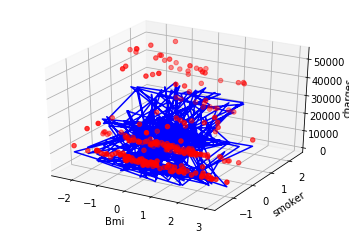

In [28]:
# 3D plotting in python
from mpl_toolkits import mplot3d
# to plot a 3D plot we create a 3D suplot on a matplotlib figure
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,1],x_te[:,2],y_te,c='red')
ax.plot3D(x_te[:,1],x_te[:,2],y_pr,c='blue')
ax.set_xlabel('Bmi')
ax.set_ylabel('smoker')
ax.set_zlabel('charges')
plt.show()